# <center> <span style="color:Darkcyan">***Tarea 1. Programación - Descripción variables numéricas***</span> </center>
### <center> <span style="color:Darkcyan">***Ariadna Sofía Contreras Abril***</span> </center>
### <center> <span style="color:Darkcyan">***Inteligencia artificial***</span> </center>

Escriba una clase con las siguientes funcionalidades:
1. Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas.
2. Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables (sepal.length, sepal.width, petal.length, etc)
3. Implemente un método que entregue los nombre de las variables disponibles.
4. Implemente un método que reciba el nombre de una variable disponible dentro del objeto (en el dataframe) y regrese: sus estadísticas básicas: media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class Stat:
    # La inicialización de la clase Stat ayuda a importar los datos de la ruta especificada en un dataframe y seleccionar 
    # sus variables numéricas
    def __init__(self,ruta):
        self.data = pd.read_csv(ruta)._get_numeric_data()
        # se elimina la primera columna 'Id' debido a que aunque es una variable numérica no tiene información
        # significativa en el análisis
        self.data.drop(self.data.columns[0] , axis=1, inplace=True)
        self.var = self.data.columns.values
        
    def Var(self):
        # El método Var muestra las variables numéricas disponibles
        return print("Las variables disponibles son:\n" + ",".join(self.var))
            
    def Stat_Descrip(self):
        # El método Stat_Descrip muestra el resumen descriptivo de todas las variables numéricas
        len_data = len(self.var)
        # creación de dataframe de medidas descriptivas
        columnas = ['Media', 'Mediana', 'Desv. Est.', 'Percentil 25', 'Percentil 75', 'Mínimo', 'Máximo']
        self.Estad = pd.DataFrame(columns = columnas)
        
        for i in range(len_data):
            # se crea una variable con los datos de cada variable
            var_data = self.data[self.var[i]]
            # se calculan estadísticas descriptivas de la variable
            x=[np.mean(var_data), np.median(var_data), np.std(var_data), np.percentile(var_data, 25), 
               np.percentile(var_data, 75), np.min(var_data), np.max(var_data)]
            # se añaden al dataframe de medidas descriptivas
            self.Estad.loc[i] = x         
        
        self.Estad.index = self.var
        return self.Estad

    def Stat_Var(self, nombre):
        # se escoge la fila del dataframe de medidas descriptivas respectiva a la variabe deseada
        df = self.Estad.iloc[[i for i, num in enumerate(Iris.var) if num == nombre]]
        
        # HISTOGRAMA DE LA VARIABLE
        datos = self.data[nombre]
        fig, ax = plt.subplots()
        ax.hist(datos, color = "Darkcyan")
        ax.set_title(nombre)
        
        return display(df), plt.show(fig)

In [12]:
Ruta = "C:/Users/ASUS/OneDrive/Documentos/2023-2/Inteligencia/Iris.csv"
Iris = Stat(Ruta)
Iris.data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
Iris.Stat_Descrip()

,Media,Mediana,Desv. Est.,Percentil 25,Percentil 75,Mínimo,Máximo
SepalLengthCm,5.843333,5.80,0.825301,5.1,6.4,4.3,7.9
SepalWidthCm,3.054000,3.00,0.432147,2.8,3.3,2.0,4.4
PetalLengthCm,3.758667,4.35,1.758529,1.6,5.1,1.0,6.9
PetalWidthCm,1.198667,1.30,0.760613,0.3,1.8,0.1,2.5


In [14]:
Iris.Var()

Las variables disponibles son:
SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm


,Media,Mediana,Desv. Est.,Percentil 25,Percentil 75,Mínimo,Máximo
SepalWidthCm,3.054,3.0,0.432147,2.8,3.3,2.0,4.4


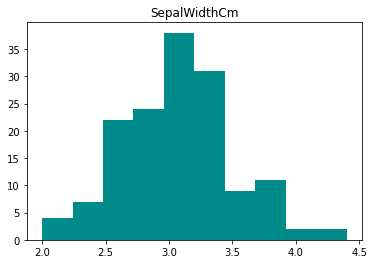

(None, None)

In [15]:
Iris.Stat_Var('SepalWidthCm')